This exercise is to walk through an ML modeling procedure with real world dataset.  
There are several weaknesses/problems we can identify them then improve the model development process.

## Preparation

Note: the running environment for this notebook is python3.7 (Anaconda distribution). Some common python packages are required to run this notebook (see 'packages_version.txt'). Please make sure you have installed the required packages (and check if the versions are correct in case you meet problems).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, fit_grid_point

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import some helper function
from help_functions import OHE_get_dummies, RandomForest_feature_selection

In [6]:
seed = 12345
# seed = random.randint(0, 100000)
np.random.seed(seed)

In [7]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

import local files 

In [8]:
#plot model evaluation metrics
from plotting import *

#pre-processing pipe line functions
from pre_processing import *

#random search regression models
from classifiers import *

#exploration functions
from data_exploration import *

### Data description

This dataset employed a __binary variable__, default payment next month (Yes = 1, No = 0), as the response variable. The model uses the following 26 features as raw input: 

* ID: ID of each client


* LIMIT_BAL: Amount of given credit in dollars (includes individual and family/supplementary credit


* JOB_TYPE: 15 types of occupations


* WORK_YEARS: number of work years


* SEX: Gender (1=male, 2=female)


* EDUCATION: (1=graduate school, 2=university, 3=high school; 0, 4, 5, 6=others)


* MARRIAGE: Marital status (1=married, 2=single, 3 = divorced, 0=others)


* AGE: Age in years


* PAY_0: Repayment status in September, 2015 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above)


* PAY_2: Repayment status in August, 2015 (scale same as above)


* PAY_3: Repayment status in July, 2015 (scale same as above)


* PAY_4: Repayment status in June, 2015 (scale same as above)


* PAY_5: Repayment status in May, 2015 (scale same as above)


* PAY_6: Repayment status in April, 2015 (scale same as above)


* BILL_AMT1: Amount of bill statement in September, 2015 (dollar)


* BILL_AMT2: Amount of bill statement in August, 2015 (dollar)


* BILL_AMT3: Amount of bill statement in July, 2015 (dollar)


* BILL_AMT4: Amount of bill statement in June, 2015 (dollar)


* BILL_AMT5: Amount of bill statement in May, 2015 (dollar)


* BILL_AMT6: Amount of bill statement in April, 2015 (dollar)


* PAY_AMT1: Amount of previous payment in September, 2015 (dollar)


* PAY_AMT2: Amount of previous payment in August, 2015 (dollar)


* PAY_AMT3: Amount of previous payment in July, 2015 (dollar)


* PAY_AMT4: Amount of previous payment in June, 2015 (dollar)


* PAY_AMT5: Amount of previous payment in May, 2015 (dollar)


* PAY_AMT6: Amount of previous payment in April, 2015 (dollar)

### Load the dataset

In [9]:
data = pd.read_csv("../dataset/dataset.csv", index_col=None)

In [10]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,7303.0,29777.0,27240.0,12937.0,8669.0,10923.0,21223.0,2551.0,4358.0,23008.0
LIMIT_BAL,390000.0,290000.0,240000.0,220000.0,280000.0,90000.0,140000.0,30000.0,NaN,240000.0
JOB_TYPE,3.0,6.0,11.0,2.0,5.0,11.0,6.0,3.0,NaN,2.0
WORK_YEARS,NaN,NaN,NaN,NaN,9.0,NaN,NaN,10.0,NaN,NaN
SEX,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0
EDUCATION,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0
MARRIAGE,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
AGE,34.0,33.0,39.0,32.0,35.0,32.0,33.0,26.0,NaN,38.0
PAY_0,-2.0,0.0,-1.0,1.0,0.0,0.0,-2.0,0.0,NaN,-2.0
PAY_2,-2.0,0.0,-1.0,2.0,0.0,0.0,-2.0,0.0,0.0,-2.0


In [11]:
data.shape

(24028, 27)

## Part 1. Feature engineering

### One-hot-encoding

In [12]:
columns_categ = ["JOB_TYPE", "SEX", "MARRIAGE", "EDUCATION"]

OHE_job = OHE_get_dummies(data, "JOB_TYPE")
OHE_sex = OHE_get_dummies(data, "SEX")
OHE_marriage = OHE_get_dummies(data, "MARRIAGE")
OHE_education = OHE_get_dummies(data, "EDUCATION")

In [13]:
print(OHE_job.shape)
print(OHE_sex.shape)
print(OHE_marriage.shape)
print(OHE_education.shape)

(24028, 15)
(24028, 2)
(24028, 4)
(24028, 7)


In [14]:
columns_all = data.columns.tolist()
columns_exclude = ["ID", "JOB_TYPE", "SEX", "MARRIAGE", "EDUCATION", "default payment next month"]

# get all the numerical variables names
columns_numerical = [column for column in columns_all if column not in columns_exclude]

In [15]:
len(columns_numerical)

21

In [16]:
# concatenate the one-hot-encoding columns and numerical columns as the input data
data = pd.concat([OHE_job, OHE_sex, OHE_marriage, OHE_education, data[columns_numerical], data["default payment next month"]], axis = 1)
data.shape

(24028, 50)

In [17]:
df_input = data.iloc[:,:-1]
df_label = data.iloc[:,-1]
input_columns = df_input.columns.to_list()

### Impute the missing values using **mean**

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df_input_imp = imp_mean.fit_transform(df_input)
df_input_imp = pd.DataFrame(df_input_imp, columns = input_columns)
# hold_input_imp = imp_mean.transform(hold_input)
# hold_input_imp = pd.DataFrame(hold_input_imp, columns = input_columns)

### Do feature selection using random forest

In [20]:
# columns_categ = ["JOB_TYPE", "SEX", "MARRIAGE", "EDUCATION"]
# _, feature_score_dict_all = RandomForest_feature_selection(input_columns, columns_categ, df_input_imp, df_label, seed)

# #you can also check the output file "./RandomForest_feature_importance.txt" for more details on the feature importance.
# len(feature_score_dict_all)

__We decided to select only the top 20 features (based on the importance ranking shown above) as our final model input to reduce the model complexity and risk of overfitting__

In [21]:
# top20 = [a for a, b in feature_score_dict_all[:20]]
# columns_X = [x for x in input_columns if x in top20]
columns_X = [x_selected for x_selected in input_columns if x_selected not in ['WORK_YEARS', "PAY_6", "PAY_4", "PAY_3", "PAY_5"]]
len(columns_X)

44

## Part 2. Model training

### Split the data into training/test sets

In [22]:
df_X = df_input_imp
df_Y = df_label
# hold_X = hold_input_imp
# hold_Y = hold_label

# data is split in a stratified fashion based on target labels
train_X, test_X, train_Y, test_Y= train_test_split(df_X, df_Y, train_size = 0.7, random_state = seed, stratify = df_Y)

In [23]:
data.iloc[train_X.index].to_csv("../dataset/training_set.csv", index=True)
data.iloc[test_X.index].to_csv("../dataset/test_set.csv", index=True)
# data.iloc[hold_X.index].to_csv("../dataset/hold_set.csv", index=True)

In [24]:
print(train_X.shape, test_X.shape)

(16819, 49) (7209, 49)


### Use the selected features to train the model

We decided to use __XGBoost__

In [25]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, roc_auc_score

In [26]:
### only use the selected features
train_X_try = train_X[columns_X]
test_X_try = test_X[columns_X]
# hold_X_try = hold_X[columns_X]
print(train_X.shape)
print(test_X_try.shape)
# print(hold_X_try.shape)

(16819, 49)
(7209, 44)


### Hyperparamater tuning

We decided to tune the maximum depth, the number of trees and the column sampling rate (by level) and find the best performing model hyperparameter combinations:

In [27]:
### hyperparameters

hyperparas_xgb = {"objective": ['binary:logistic'], "n_estimators": [50, 100],
                  "max_depth": [3, 6], "colsample_bylevel": [0.8, 1]}


hyperparas_xgb_list = list(ParameterGrid(hyperparas_xgb))

In [28]:

for hyperpara in hyperparas_xgb_list:
    
    print("hyperparamaters: " + str(hyperpara) + "\n")
    
    model = XGBClassifier(**hyperpara, seed = seed)
    
    model.fit(train_X_try, train_Y, eval_metric='logloss', 
             eval_set=[(test_X_try, test_Y)], verbose=False)
    
    print("Performance (test set): \n")
    
    y_pre = model.predict(test_X_try)
    y_pro = model.predict_proba(test_X_try)[:, 1]
    
    print("AUC Score : %.4f" % roc_auc_score(test_Y, y_pro))
    print("Accuracy : %.4f \n" % accuracy_score(test_Y, y_pre))


hyperparamaters: {'colsample_bylevel': 0.8, 'max_depth': 3, 'n_estimators': 50, 'objective': 'binary:logistic'}

Performance (test set): 

AUC Score : 0.7526
Accuracy : 0.9725 

hyperparamaters: {'colsample_bylevel': 0.8, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic'}

Performance (test set): 

AUC Score : 0.7542
Accuracy : 0.9725 

hyperparamaters: {'colsample_bylevel': 0.8, 'max_depth': 6, 'n_estimators': 50, 'objective': 'binary:logistic'}

Performance (test set): 

AUC Score : 0.7457
Accuracy : 0.9724 

hyperparamaters: {'colsample_bylevel': 0.8, 'max_depth': 6, 'n_estimators': 100, 'objective': 'binary:logistic'}

Performance (test set): 

AUC Score : 0.7474
Accuracy : 0.9724 

hyperparamaters: {'colsample_bylevel': 1, 'max_depth': 3, 'n_estimators': 50, 'objective': 'binary:logistic'}

Performance (test set): 

AUC Score : 0.7502
Accuracy : 0.9725 

hyperparamaters: {'colsample_bylevel': 1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic'}

In [29]:
# use the best hyperparameters (based on the best accuracy score) to train the model

hyperparas_xgb_best = hyperparas_xgb_list[6]

print("hyperparas_xgb_bestmaters: " + str(hyperparas_xgb_best) + "\n")

model = XGBClassifier(**hyperparas_xgb_best, seed = seed)

model.fit(train_X_try, train_Y, eval_metric='logloss', 
         eval_set=[(test_X_try, test_Y)], verbose=False)

print("Performance (test set): \n")
y_pre = model.predict(test_X_try)
y_pro = model.predict_proba(test_X_try)[:, 1]
print("AUC Score : %.4f" % roc_auc_score(test_Y, y_pro))
print("Accuracy : %.4f \n" % accuracy_score(test_Y, y_pre))

hyperparas_xgb_bestmaters: {'colsample_bylevel': 1, 'max_depth': 6, 'n_estimators': 50, 'objective': 'binary:logistic'}

Performance (test set): 

AUC Score : 0.7451
Accuracy : 0.9723 



### Save the best model

Based on the hyperparameter tuning results, we now consider the model with the highest performance score on the test set is the best one. We saved the model for future use. Model development done.

In [30]:
# save the best model using pickle
import pickle

In [31]:
# save model to file
pickle.dump(model, open("best_model_xgb.dat", "wb"))

In [32]:
# load model from file
model_built = pickle.load(open("best_model_xgb.dat", "rb"))

The model will be used on a bi-monthly basis. The model performance monitoring will be carried out annually. The model performance monitoring metrics and thresholds are:

* Accuracy  -  15% below the one during initial model development - yellow status: model is revisited and causes of performance deterioration investigated.
* Accuracy  -  30% below the one during initial model development - red status: model retrained

## Part 3. Benchmark model

After investigating the presented ML model above, you have spotted several weaknesses in the process. How can you revise the model development process to build a better model (let say we still use __XGBoost__)? Describe what you will do and do it below. Please __compare__ your own XGBoost model to the previous one, and demonstrate yours is better.

You may include your comments/thoughts in this cell here

In [33]:
data = pd.read_csv("../dataset/dataset.csv", index_col=None)

### Imputing
Before imputing, we should check how many data is missing to decide whether we should drop the feature

In [34]:
missing_data = get_missing_data(data)
missing_data.head(data.shape[1])

,Missing,%
WORK_YEARS,20424,85.000832
PAY_AMT2,736,3.063093
MARRIAGE,714,2.971533
LIMIT_BAL,713,2.967371
PAY_AMT5,712,2.963210
BILL_AMT2,707,2.942401
PAY_5,707,2.942401
PAY_0,706,2.938239
PAY_2,701,2.917430
PAY_4,700,2.913268


We can safely drop any features if they are not correlated with target class

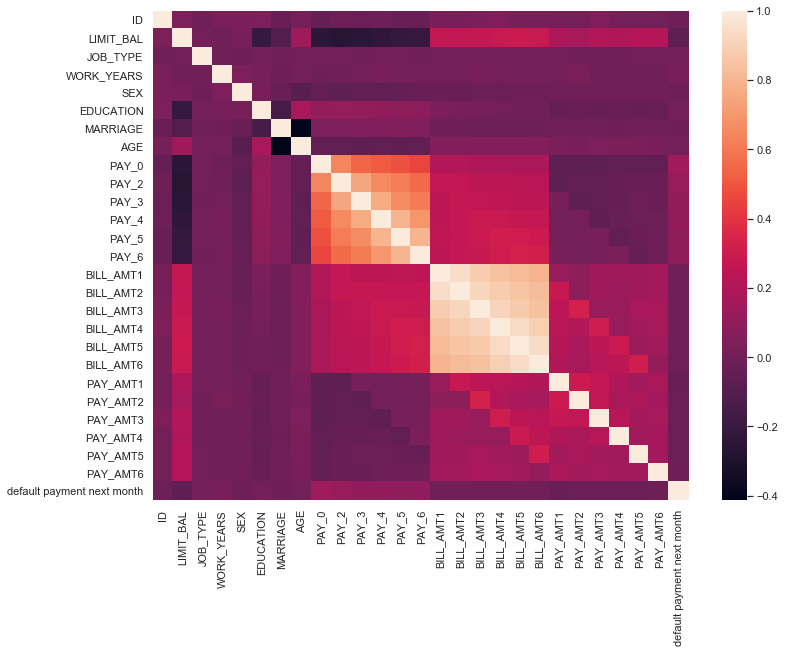

In [35]:
show_correlation(data)

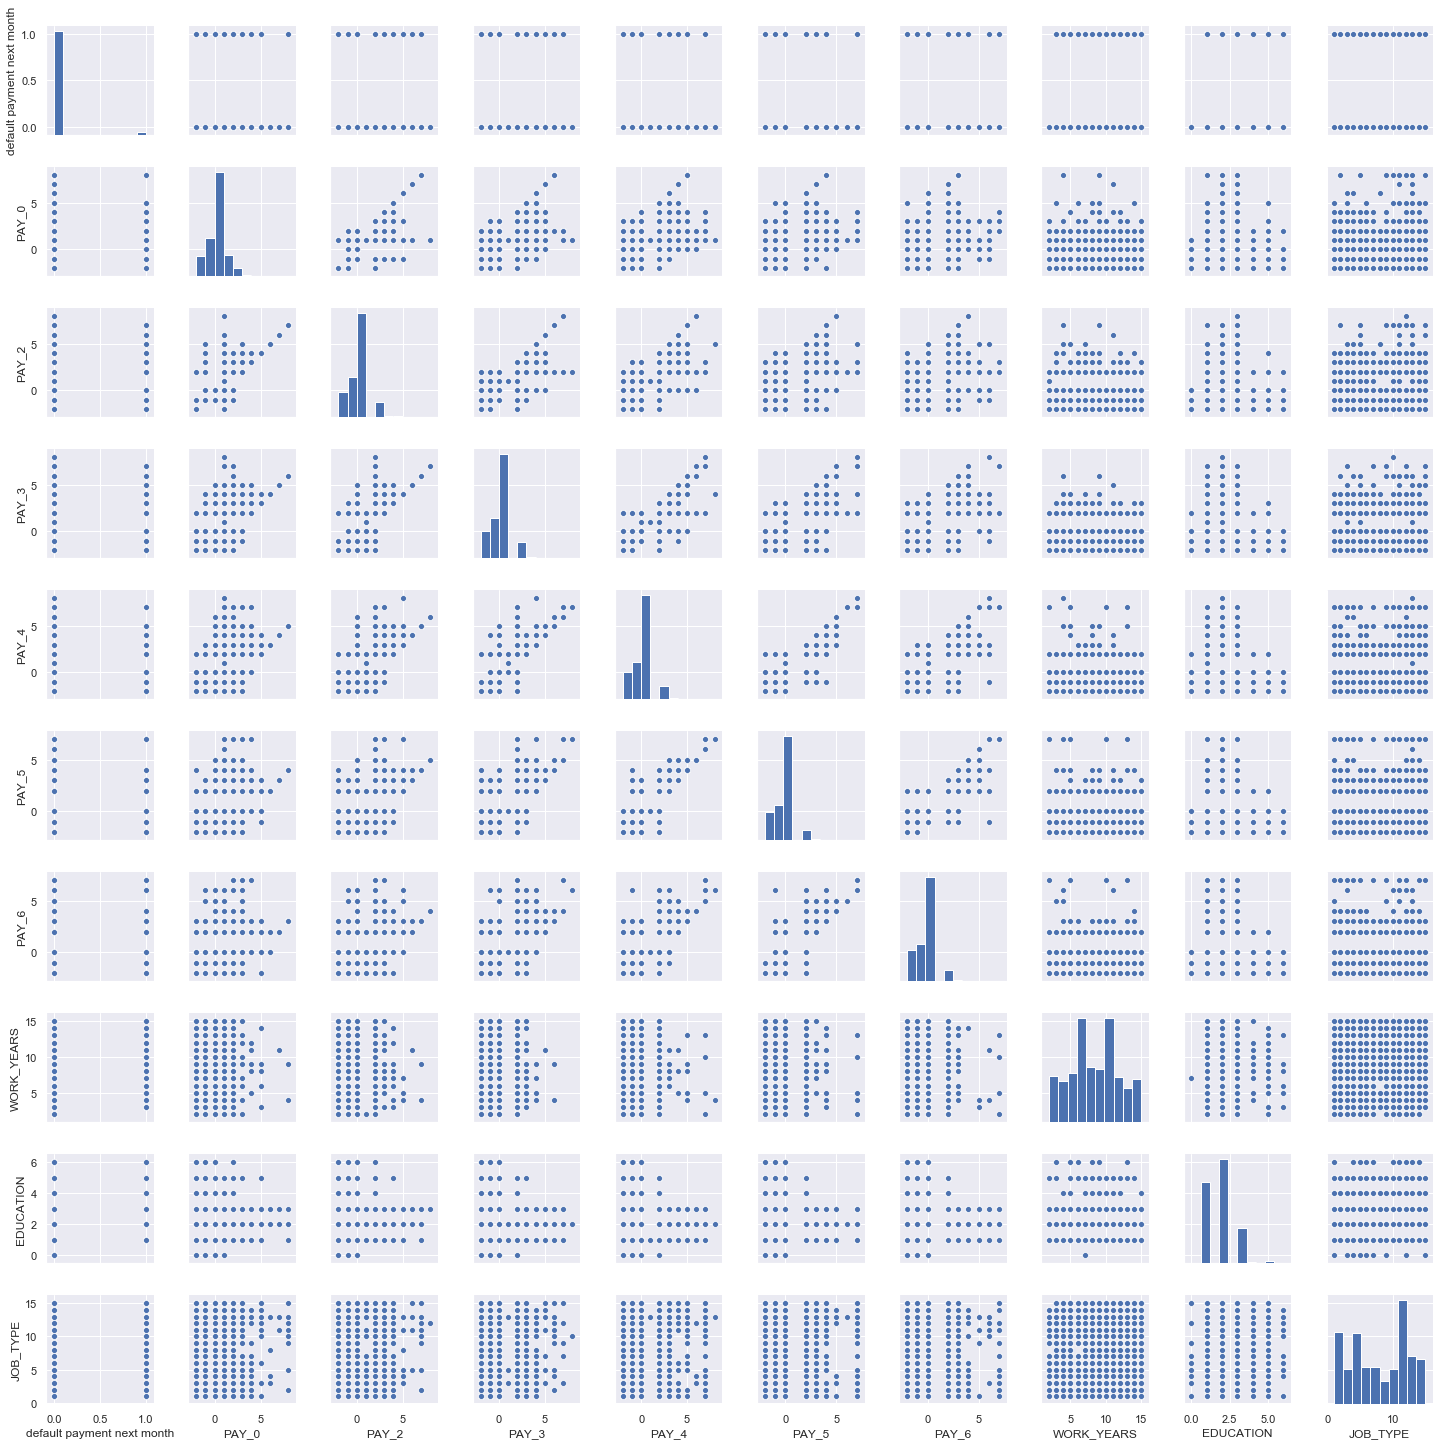

In [36]:
cols = show_top_related(data, 'default payment next month', k=10)
show_pair_plot(data[cols[:10]])

### Encoding
The previous model use one-hot encoding for all the categorical features.  
This is not appropriate since 'education' is ordinary feature and should be encoded as integers to mantain their ording relationships

In [37]:
columns_categ = ["JOB_TYPE", "SEX", "MARRIAGE"]
OHE_job = OHE_get_dummies(data, "JOB_TYPE")
OHE_sex = OHE_get_dummies(data, "SEX")
OHE_marriage = OHE_get_dummies(data, "MARRIAGE")

In [38]:
print(OHE_job.shape)
print(OHE_sex.shape)
print(OHE_marriage.shape)

(24028, 15)
(24028, 2)
(24028, 4)


In [39]:
columns_all = data.columns.tolist()
columns_exclude = ["ID", "JOB_TYPE", "SEX", "MARRIAGE", "default payment next month"]

# get all the numerical variables names
columns_numerical = [column for column in columns_all if column not in columns_exclude]

In [40]:
len(columns_numerical)

22

In [41]:
# concatenate the one-hot-encoding columns and numerical columns as the input data
data = pd.concat([OHE_job, OHE_sex, OHE_marriage, data[columns_numerical], data["default payment next month"]], axis = 1)
data.shape

(24028, 44)

In [42]:
data = data.astype('float64')

### Train/Valid/Test Set
The data set should be split into three parts for different usage purpose, the test set should not be used for imputing or feature selection  
In my approach, I use holdout set for model evaluation and rest data set for training and validation

In [43]:
default = data[data['default payment next month'] == 1.0]
default_train, default_test= train_test_split(default, train_size = 0.7, random_state = seed)
non_default = data[data['default payment next month'] == 0.0]
non_default_train, non_default_test= train_test_split(non_default, train_size = 0.7, random_state = seed)
train = pd.concat([default_train, non_default_train])
holdout = pd.concat([default_test, non_default_test])

In [44]:
train.shape, holdout.shape

((16818, 44), (7210, 44))

In [45]:
data['default payment next month'].value_counts()

0.0    23364
1.0      664
Name: default payment next month, dtype: int64

In [46]:
train['default payment next month'].value_counts()

0.0    16354
1.0      464
Name: default payment next month, dtype: int64

In [47]:
holdout['default payment next month'].value_counts()

0.0    7010
1.0     200
Name: default payment next month, dtype: int64

In [48]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1].astype(int)
X_test = holdout.iloc[:,:-1]
y_test = holdout.iloc[:,-1].astype(int)
X_train.shape, X_test.shape,

((16818, 43), (7210, 43))

### Sampling
The distribution of default class and non-default class is very imbalanced, so we should sample the data before training

#### UnderSampling
Sample non-default rows and keep all default rows, make it even.

In [49]:
def undersample(df, n=None):
    fraud_indexs = df[df.iloc[:,-1] == 1].index
    normal_indexs = df[df.iloc[:,-1] == 0].index
#     print(fraud_indexs)
#     print(normal_indexs)
    if n == None:
        num_of_sample = len(fraud_indexs)
    else:
        num_of_sample = n
        
    #sample normal from all normal
    sample_indexs = np.random.choice(normal_indexs, num_of_sample, replace = False)
    total_indexs = np.concatenate([fraud_indexs,sample_indexs])
    sample_df = data.iloc[total_indexs,:]
    print('Sample %s records from %s rows.'%(num_of_sample * 2,len(normal_indexs)))    
    return sample_df

In [50]:
under_sample_train = undersample(train)
X_sample_train = under_sample_train.loc[:, under_sample_train.columns != 'default payment next month']
y_sample_train = under_sample_train['default payment next month']

under_sample_hold = undersample(holdout)
X_sample_hold = under_sample_hold.loc[:, under_sample_hold.columns != 'default payment next month']
y_sample_hold = under_sample_hold['default payment next month']


under_sample_N = undersample(holdout, 2000)
X_sample_N = under_sample_N.loc[:, under_sample_N.columns != 'default payment next month']
y_sample_N = under_sample_N['default payment next month']
under_sample_train.shape, under_sample_hold.shape

Sample 928 records from 16354 rows.
Sample 400 records from 7010 rows.
Sample 4000 records from 7010 rows.


((928, 44), (400, 44))

In [51]:
y_sample_train.value_counts()

0.0    464
1.0    464
Name: default payment next month, dtype: int64

### Hyperparameters Search + Cross Validation 
Random search is faster than grid search with same performance  
We need to use cross-validation to avoid overfitting

In [52]:
"""
Pipeline class takes pre-processing functions and their parameters,
process the data before making predictions, store processed data and best models afterwards.
See pre_processing.py, regressors.py and plotting.py for more details.
"""
class Pipeline:
    #take a dictionary with function as key and functions' parameters as value
    def __init__(self, transformers):
        self.transformers = transformers
        self.estimators = None
        self.estimators_times = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
    
    #preprocess dataset with given functions and store in the model
    #see pre_processing.py
    def fit(self, x_train, y_train, x_test, y_test):
        x_train, x_test = x_train, x_test
        for trans in self.transformers:
            param = self.transformers[trans]
            if param == None:
                x_train, x_test = trans(x_train, x_test)
            elif type(param) is list and len(param)==2:
                x_train, x_test = trans(x_train, x_test, param[0], param[1])
            else:
                x_train, x_test = trans(x_train, x_test, param)
        self.X_train = x_train
        self.X_test = x_test
        self.y_train = y_train.astype(int)
        self.y_test = y_test.astype(int)
    
    #make prediction and evaluate with defualt metrics.
    #see regressors.py and plotting.py
    def predict(self, estimator='all', plot=True):
        assert self.X_train is not None
        if estimator == 'all':
            all_clfs, clf_names, clf_times = run_all_clfs(self.X_train, self.y_train, self.X_test, self.y_test)
        elif estimator == 'lr':
            all_clfs, clf_names, clf_times = run_lr_clf(self.X_train, self.y_train, self.X_test, self.y_test)
        elif estimator == 'xgb':
            all_clfs, clf_names, clf_times = run_xgb_clf(self.X_train, self.y_train, self.X_test, self.y_test)
        if plot:
            roc, pr = evaluate_classifiers(self.X_test, self.y_test, all_clfs, clf_names, FILE_NAME, OUTPUT_PATH)
            print('Training Set: X_train %s, y_train %s'%(self.X_train.shape, self.y_train.shape))
            print('Test Set: X_test %s, y_test %s'%(self.X_test.shape, self.y_test.shape))
        self.estimators = all_clfs
        self.estimators_times = clf_times

In [53]:
FILE_NAME = None
OUTPUT_PATH = None

### Evaluation Metrics
Accuracy is not a good metric when dealing with imbalanced data, the model will cheat by predict all instance as non-default and acchieve 99% accuracy.  
We use ROC and PR curves + confusion matrix to evaluate our model

#### Old Model
previous model trained on whole data set, area under PR curve is very small

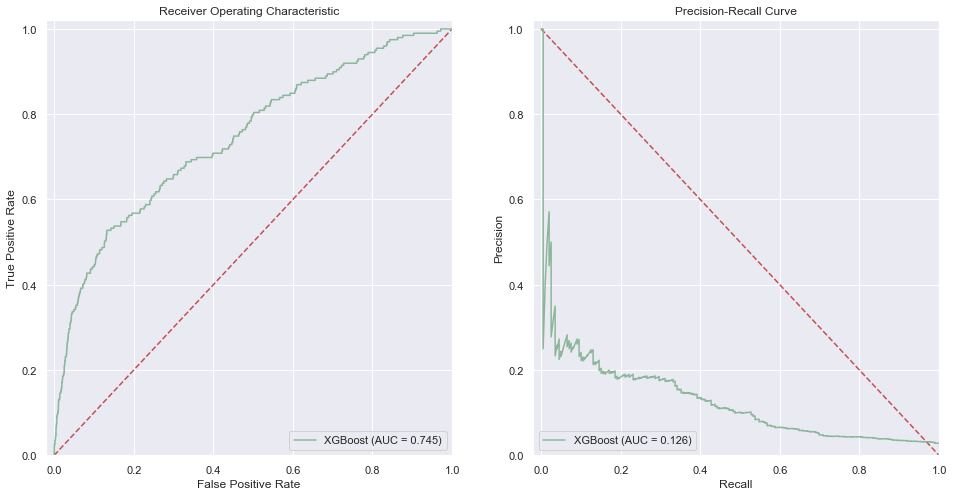

Training Set: X_train (16819, 44), y_train (16819,)
Test Set: X_test (7209, 44), y_test (7209,)


In [54]:
evaluate_classifiers(test_X_try, test_Y, all_clfs=[model_built], clf_names=['XGBoost'])
print('Training Set: X_train %s, y_train %s'%(train_X_try.shape, train_Y.shape))
print('Test Set: X_test %s, y_test %s'%(test_X_try.shape, test_Y.shape))

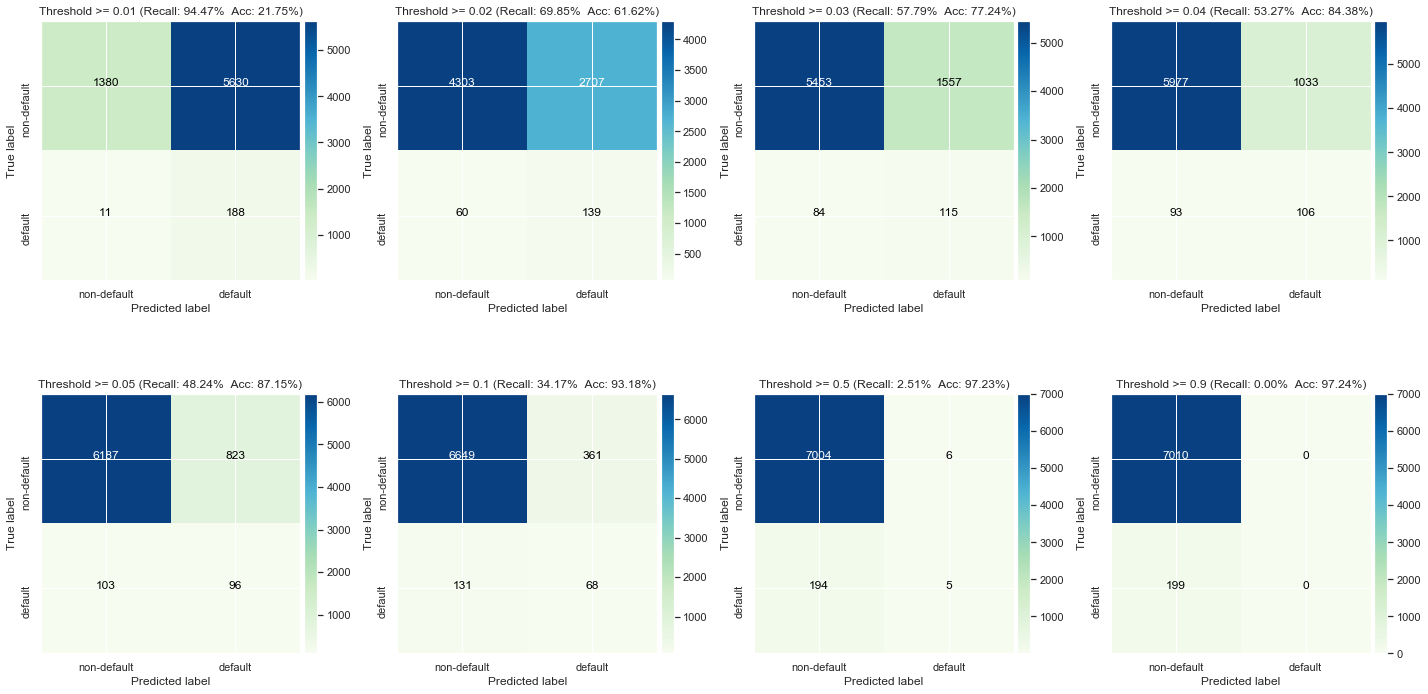

In [55]:
class_names = ['non-default', 'default']
thresholds = [0.01,0.02,0.03,0.04,0.05,0.1,0.5,0.9]
plot_cm_thresholds(model_built, test_X_try, test_Y, classes=class_names, thresholds=thresholds)

#### New Model
challenger model trained on unsersample set, area under PR curve is slightly better

Imputed missing data with "median"
Training XGBoost ...


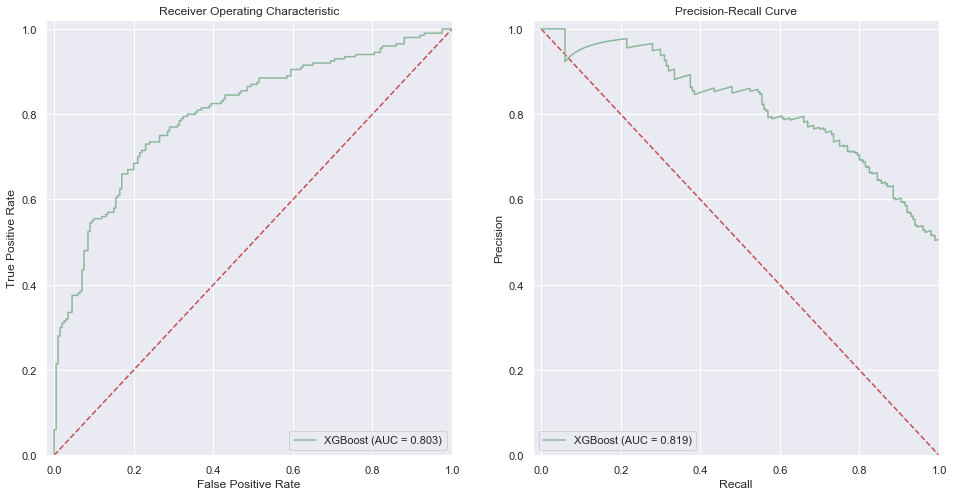

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
CPU times: user 4.56 s, sys: 17.6 ms, total: 4.58 s
Wall time: 4.59 s


In [56]:
%%time
model = Pipeline({
#     encode_labels:preprocessing.LabelEncoder(),
#     drop_features:0.5,
#     impute_value:'most_frequent',
    impute_value:'median',
#     standardize_data:preprocessing.StandardScaler(),
#     standardize_data:preprocessing.MinMaxScaler(),
#     dimension_reduction:20,
})
model.fit(X_sample_train, y_sample_train, X_sample_hold, y_sample_hold)
# model.fit(X_sample_train, y_sample_train, X_test, y_test)
model.predict(estimator='xgb')
xgb = model.estimators[0]

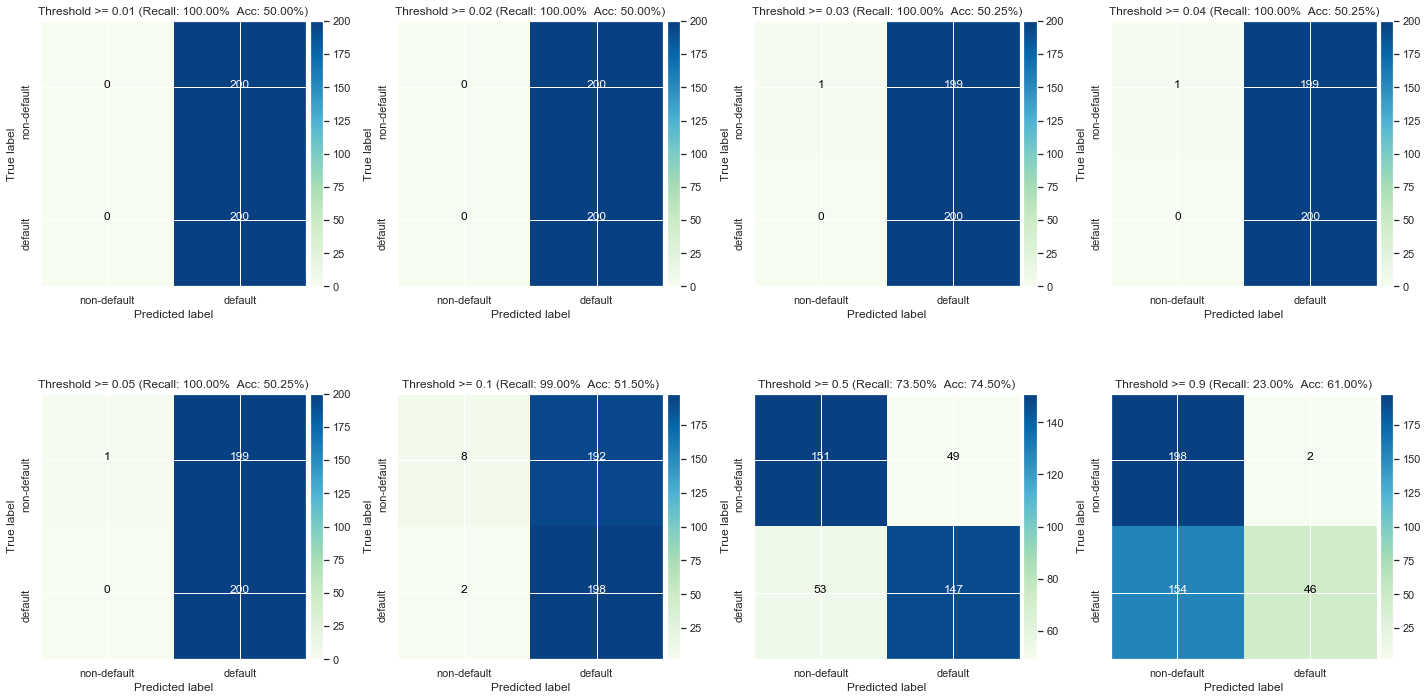

In [57]:
class_names = ['non-default', 'default']
thresholds = [0.01,0.02,0.03,0.04,0.05,0.1,0.5,0.9]
plot_cm_thresholds(model.estimators[0], model.X_test,model.y_test, classes=class_names, thresholds=thresholds)
# plot_cm_thresholds(model.estimators[0], X_test, y_test, classes=class_names, thresholds=thresholds)

### AutoEncoder(Deep Learning)
We use autoencoder to do data augmentation, increase original dimesion to 250 to find out deep relations between features.

The idea is train the independent variables(features) on themselves instead of on target to get hidden representation of the data.  
When training finish, we will get new data sets with much lower/higher dimensions which contains more hidden informations about the features.

In [58]:
import torch
from torch import nn
from torch.nn import Linear, ReLU, Sequential
import torch.optim as optim

In [59]:
pipeline = Pipeline({
#     encode_labels:preprocessing.LabelEncoder(),
    impute_value:'mean',
#     standardize_data:preprocessing.StandardScaler(),
    standardize_data:preprocessing.MinMaxScaler(),
})
# pipeline.fit(X_sample_train, y_sample_train, X_sample_hold, y_sample_hold)
# pipeline.fit(X_sample_train, y_sample_train, X_sample_N, y_sample_N)
pipeline.fit(X_sample_train, y_sample_train, X_test, y_test)

Imputed missing data with "mean"
Standardized data with MinMaxScaler


In [60]:
pipeline.X_train.shape, pipeline.X_test.shape, 

((928, 43), (7210, 43))

Create different training sets for different classes.

In [61]:
classes = ['non-default', 'default']
total_class = len(classes)
all_x_train = []
all_x_test = []
all_x_torch = []
for i in range(total_class):
    all_x_train.append(pipeline.X_train[pipeline.y_train.values == i])
    all_x_test.append(pipeline.X_test[pipeline.y_test.values == i])
    all_x_torch.append(torch.tensor(pipeline.X_train[pipeline.y_train.values == i].values.astype(np.float32)))

In [62]:
len(all_x_train),len(all_x_test),len(all_x_torch)

(2, 2, 2)

#### Build autoencoder
Build 5 layers 250 dimension neural network as autoencoder.

In [63]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_torch.shape[1], 500),
            nn.ReLU(True),
            nn.Linear(500, 250),
            nn.ReLU(True),
            nn.Linear(250, 250),
            nn.ReLU(True), 
        )    
        self.decoder = nn.Sequential(
            nn.Linear(250, 500),
            nn.ReLU(True), 
            nn.Linear(500, X_torch.shape[1]),
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#### Train autoencoder
Train different autoencoder separately for different classes.

In [64]:
all_autoencoder = []
for X_torch in all_x_torch:
    torch.manual_seed(0)
    autoencoder = Autoencoder()

    loss = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)

    batch_size = 128
    num_epoch = 500

    for epoch in range(num_epoch):
        
        # Make an entire pass (an 'epoch') over the training data in batch_size chunks
        for i in range(0, len(X_torch), batch_size):
            X = X_torch[i:i+batch_size]  
            pred = autoencoder(X)
            l = loss(pred, X)                 

            autoencoder.zero_grad()                   
            l.backward()                       
            optimizer.step()   

        if (epoch+1)%100==0:    
            print("Epoch %d final minibatch had loss %.4f" % (epoch+1, l.item()))
    all_autoencoder.append(autoencoder)

Epoch 100 final minibatch had loss 0.0008
Epoch 200 final minibatch had loss 0.0003
Epoch 300 final minibatch had loss 0.0003
Epoch 400 final minibatch had loss 0.0002
Epoch 500 final minibatch had loss 0.0003
Epoch 100 final minibatch had loss 0.0005
Epoch 200 final minibatch had loss 0.0002
Epoch 300 final minibatch had loss 0.0001
Epoch 400 final minibatch had loss 0.0003
Epoch 500 final minibatch had loss 0.0002


#### Get hidden representation
Get hidden representation by applying encoder on data, concatenate all classes back to original rows.

In [65]:
def get_all_hidden(all_autoencoder, all_x_class):
    all_x_hidden = []
    all_y_hidden = []
    
    for i,x_class_i in enumerate(all_x_class):
        x_hidden = all_autoencoder[i].encoder(torch.tensor(x_class_i.values.astype(np.float32))).detach().numpy()
        all_x_hidden.append(pd.DataFrame(x_hidden))
        y_hidden = pd.Series(np.full(x_class_i.shape[0],i))
        all_y_hidden.append(y_hidden)
    
    X_hidden = pd.concat(all_x_hidden,axis=0)
    y_hidden = pd.concat(all_y_hidden,axis=0).astype('int64')
    return X_hidden, y_hidden

In [66]:
X_hidden_train, y_hidden_train = get_all_hidden(all_autoencoder, all_x_train)
X_hidden_test, y_hidden_test = get_all_hidden(all_autoencoder, all_x_test)

#### Final Model
We were able to achieve much better performance by training on hidden representation of original data  
It is worth noting to mention that we only used 4% of the data as training set and evaluated the model on 30% of untouched test set, so the result was not likely caused by overfitting or any data leakage which make it more convincing.

Training XGBoost ...


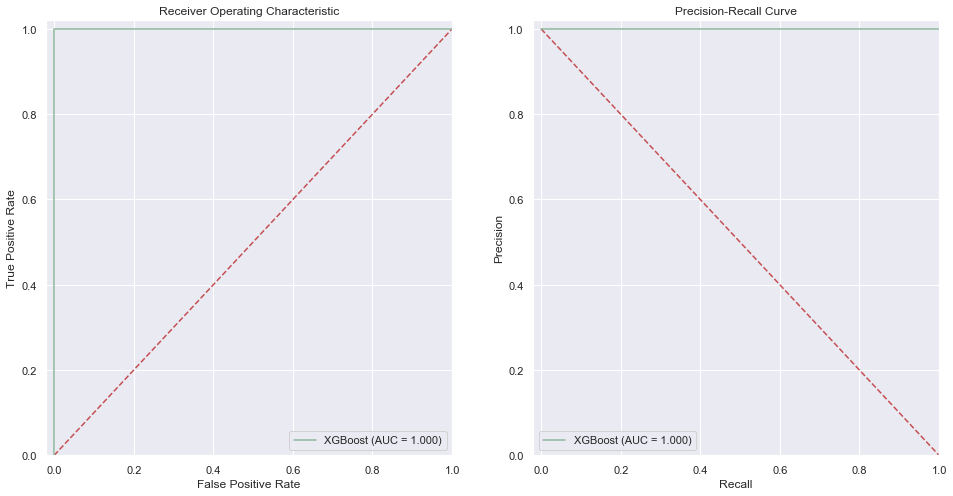

Training Set: X_train (928, 250), y_train (928,)
Test Set: X_test (7210, 250), y_test (7210,)
CPU times: user 11.9 s, sys: 46.5 ms, total: 11.9 s
Wall time: 10.9 s


In [67]:
%%time
final = Pipeline({})
final.fit(X_hidden_train, y_hidden_train, X_hidden_test, y_hidden_test)
final.predict(estimator='xgb')

In [68]:
# plt.figure(figsize=(22,10))
# for i,e in enumerate(final.estimators):
#     plt.subplot(2,4,i+1)
#     name = str(e).split('(')[0]
#     plot_confusion_matrix(e, final.X_test, final.y_test, classes=classes, cmap=plt.cm.GnBu, normalize=None, title=name)

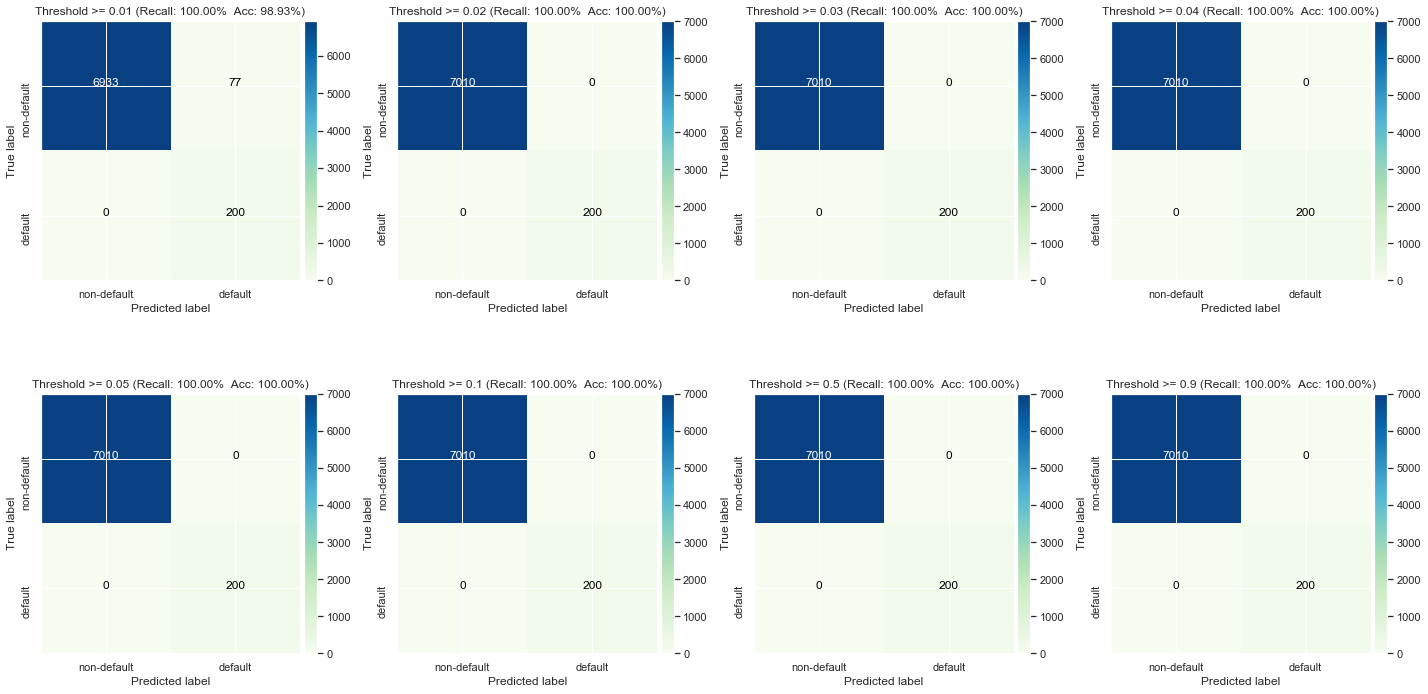

In [69]:
class_names = ['non-default', 'default']
thresholds = [0.01,0.02,0.03,0.04,0.05,0.1,0.5,0.9]
plot_cm_thresholds(final.estimators[0], final.X_test, final.y_test, classes=class_names, thresholds=thresholds)
# plot_cm_thresholds(model.estimators[0], X_test, y_test, classes=class_names, thresholds=thresholds)

## Part 4. Explainability/Interpretability

Now you have trained the model and it will probably go into production, but before that, you are asked to provide some insight of the model for the bussiness use. Consider the following scenarios:

1. the model owner wants to see how the model output depends on the input features, and, thus, to undestand what features are the key drivers according to the model;


2. on the customer level, if the model has predicted a customer as default/no-default, the business side wants to know how the features of this customer lead/contribute to this prediction. Consider three cases,

    a. For a customer (i.e., a data instance) the model predicts a high probability of no-default;
    
    b. For a customer the model predicts a high probability of default;
    
    c. For a customer the model lacks the confidence to predict as default/no-default;
    
    How can we interpret our prediction in each case.

Please give the required explainability/interpretability for __the model you build__ in these two scenarios.

__Hint__: you don't need to start from scratch, do some research and see if there is any open-source package you can use.

### Feature Importance
Use permutation importance to calculate feature importance. Randomly re-order a single important column should cause less accurate predictions.


In [70]:
estimator = xgb

In [71]:
import eli5
from eli5.sklearn import PermutationImportance

In [72]:
def show_permutation_importance(estimator, data, target):
    perm = PermutationImportance(estimator, random_state=0).fit(data, target)
    return eli5.show_weights(perm, feature_names = data.columns.tolist())

In [73]:
show_permutation_importance(estimator, model.X_test, model.y_test)

Weight,Feature
0.0665 ± 0.0223,PAY_0
0.0470 ± 0.0344,PAY_2
0.0285 ± 0.0169,LIMIT_BAL
0.0270 ± 0.0128,PAY_AMT2
0.0185 ± 0.0150,PAY_4
0.0185 ± 0.0081,BILL_AMT1
0.0175 ± 0.0105,PAY_6
0.0145 ± 0.0058,PAY_AMT4
0.0130 ± 0.0102,AGE
0.0125 ± 0.0179,PAY_AMT1


### Partial Dependence
While feature importance shows what variables most affect predictions, partial dependence plots show how a feature affects predictions.

In [74]:
from pdpbox import pdp, get_dataset, info_plots

In [75]:
def show_pdp(estimator, data, feature):
    pdp_target = pdp.pdp_isolate(model=estimator, dataset=data, model_features=data.columns.tolist(), feature=feature)
    pdp.pdp_plot(pdp_target, feature)
    plt.show()

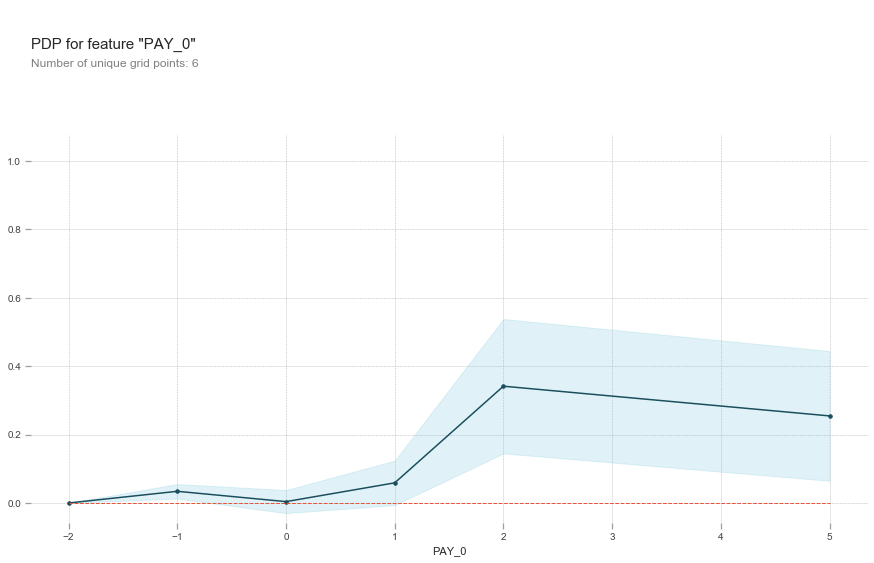

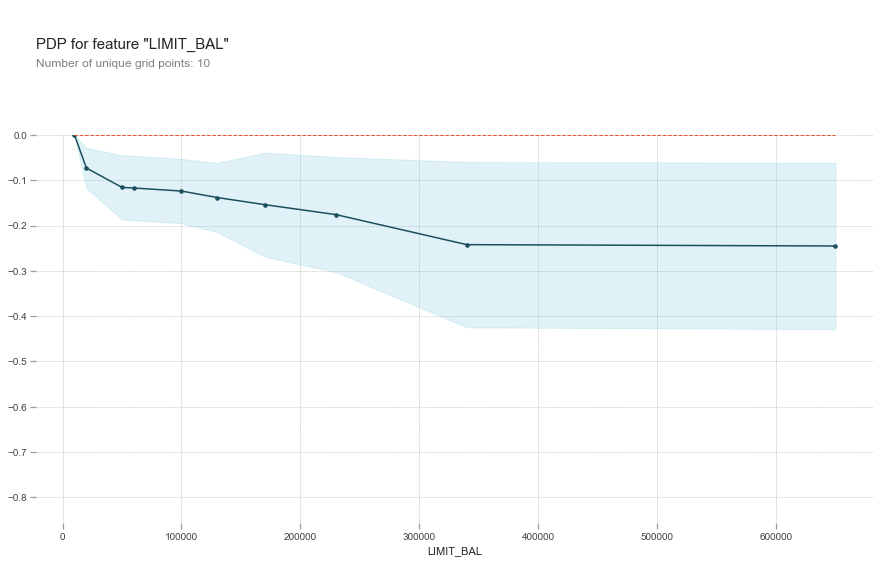

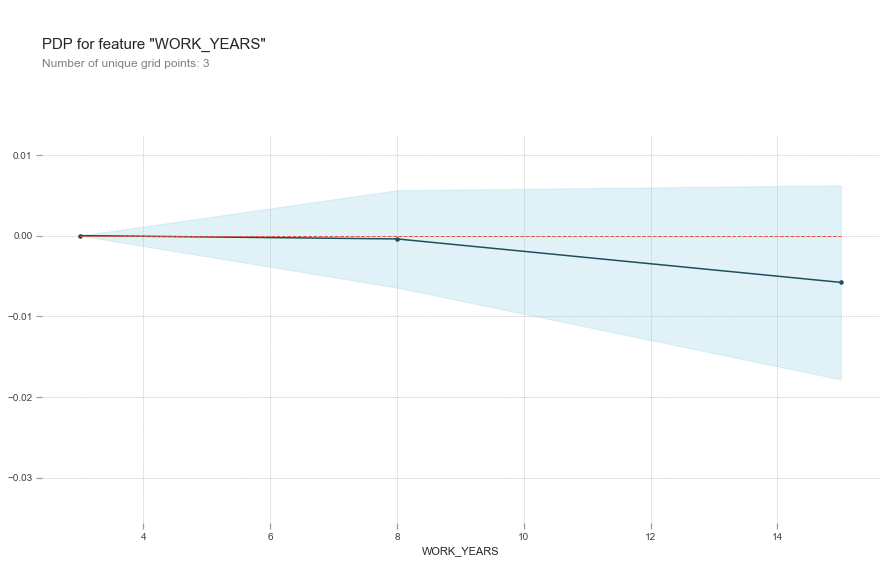

In [76]:
f1 = 'PAY_0'
f2 = 'LIMIT_BAL'
f3 = 'WORK_YEARS'
show_pdp(estimator, model.X_test, f1)
show_pdp(estimator, model.X_test, f2)
show_pdp(estimator, model.X_test, f3)

In [77]:
#2D Partial Dependence of two features
def show_2d_pdp(estimator, data, feature1,  feature2):
    features_to_plot = [feature1, feature2]
    inter1  =  pdp.pdp_interact(model=estimator, dataset=data, model_features=data.columns.tolist(), features=features_to_plot)
    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='grid')
#     pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
    plt.show()

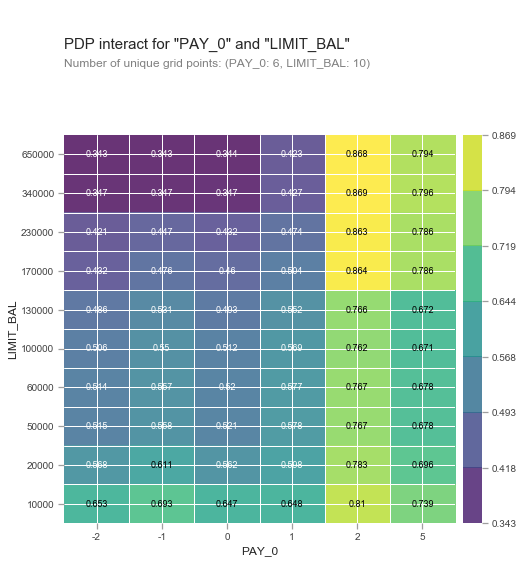

In [78]:
try:
    show_2d_pdp(estimator, model.X_test, f1, f2)
except:
    pass

### SHAP
SHAP values interpret the impact of having a certain value for a given feature in the prediction.

#### SHAP Values

In [113]:
import shap
shap.initjs()

In [80]:
#explain prediction for single row with shap score
def show_shap(estimator, data_for_prediction):
    explainer = shap.TreeExplainer(estimator)
#     explainer = shap.KernelExplainer(estimator, model.X_test)
    shap_values = explainer.shap_values(data_for_prediction)
    shap.initjs()
#     return shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)    
    return shap.force_plot(explainer.expected_value, shap_values[0], data_for_prediction)

In [81]:
estimator2 = xgb

In [82]:
explainer = shap.TreeExplainer(estimator)
print(max([sum(explainer.shap_values(model.X_test.iloc[i])[0]), i] for i in range(model.X_test.shape[0])))
print(min([sum(explainer.shap_values(model.X_test.iloc[i])[0]), i] for i in range(model.X_test.shape[0])))
print(min([abs(sum(explainer.shap_values(model.X_test.iloc[i])[0])-0), i] for i in range(model.X_test.shape[0])))

[3.811218975315569, 156]
[-3.232144520676229, 217]
[0.0033440469560446218, 371]


In [114]:
show_shap(estimator2, model.X_test.iloc[156])

In [115]:
show_shap(estimator2, model.X_test.iloc[371])

In [116]:
show_shap(estimator2, model.X_test.iloc[217])

## Part 5. More to consider

Now you have *validated* a machine learning model and even built a challenger model. However, under the scope of model validation, there are many important aspects you may take into consideration. For example,

* Model robustness (e.g., generalization of performance);

* Model performance monitoring plan assessment;

* Feature selection stability; 

* Senstivity analyses (e.g., hyperparameters)

* Bias and fairness

* And more...

We leave this part as an open question and you could provide some futher investigation as you like, in order to have a __comprehensive__ validation.

### Model Interpretability
By embedding high dimentional data into 2D space, we can easily find out how the decision was made by the model

#### Without AutoEncoder

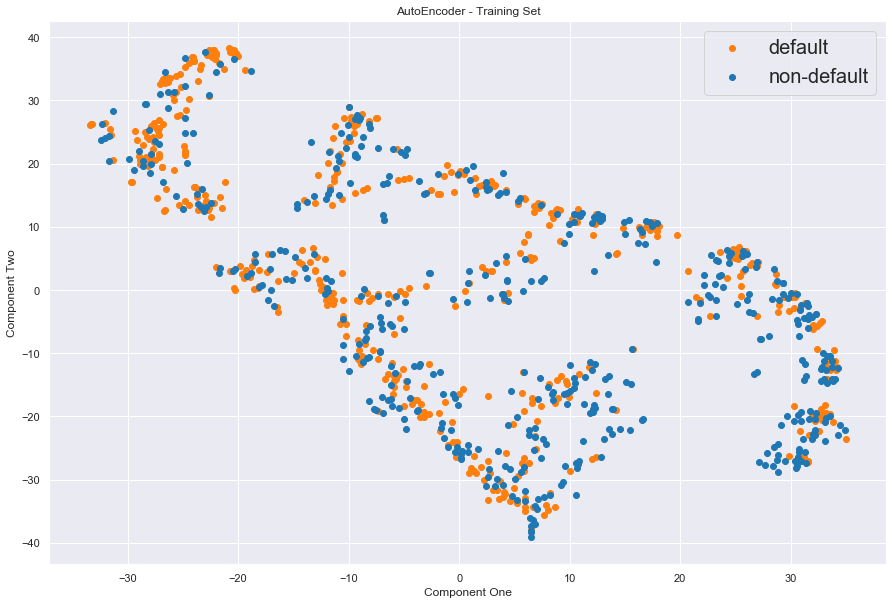

In [86]:
X_embedded = TSNE(n_components=2, random_state=1).fit_transform(model.X_train)
plot_embedding(X_embedded, model.y_train, classes, 'AutoEncoder - Training Set')

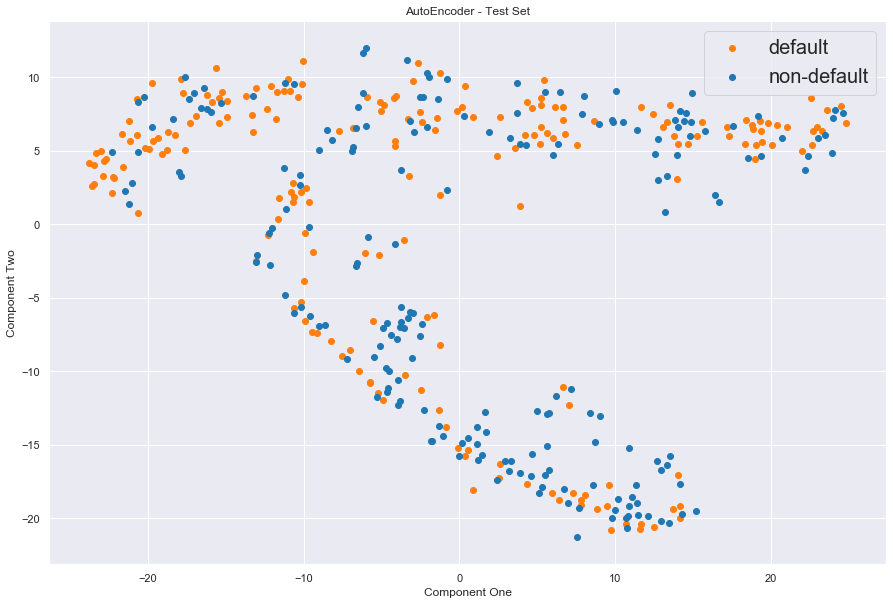

In [87]:
X_embedded = TSNE(n_components=2, random_state=4).fit_transform(model.X_test)
plot_embedding(X_embedded, model.y_test, classes, 'AutoEncoder - Test Set')

#### With AutoEncoder

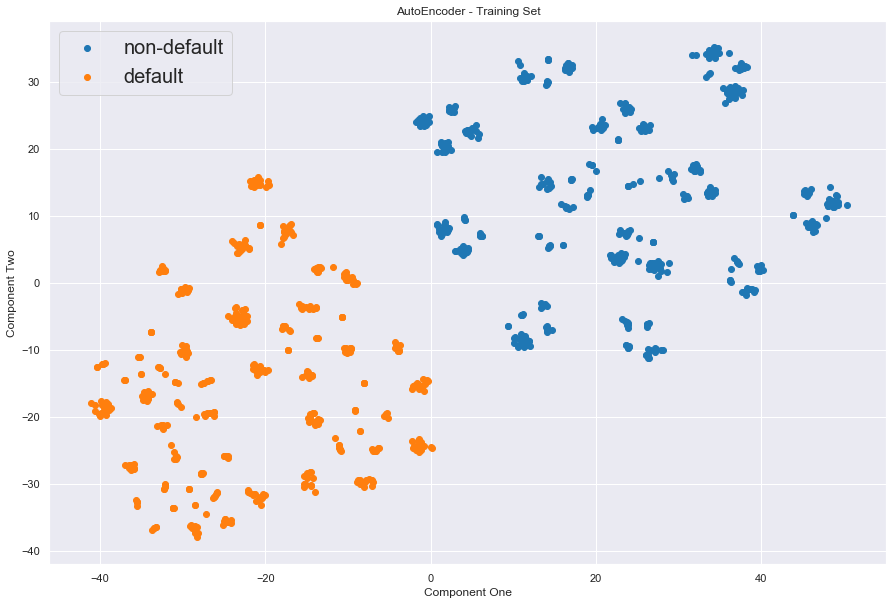

In [88]:
X_embedded = TSNE(n_components=2, random_state=1).fit_transform(X_hidden_train)
plot_embedding(X_embedded, y_hidden_train, classes, 'AutoEncoder - Training Set')

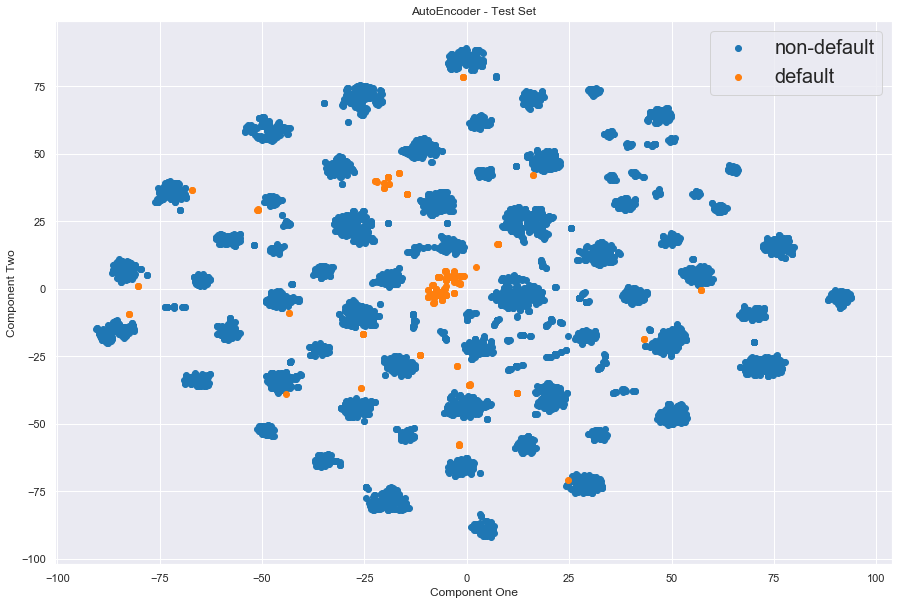

In [89]:
X_embedded = TSNE(n_components=2, random_state=4).fit_transform(X_hidden_test)
plot_embedding(X_embedded, y_hidden_test, classes,'AutoEncoder - Test Set')

### Model Robustness (generalization)
To evaluate the model generalization performance, we sample 10 times form unseen data as test set and see how it performs

In [90]:
N = 10
models = []
all_X_sample_test = []
all_y_sample_test = []
for x in range(N):
    seed = random.randint(0, 100000)
    np.random.seed(seed)
    sample_test = undersample(holdout)
    X_sample_test = sample_test.loc[:, sample_test.columns != 'default payment next month']
    y_sample_test = sample_test['default payment next month']
    model.fit(X_sample_train, y_sample_train, X_sample_test, y_sample_test)
    model.predict(estimator='xgb', plot=False)
    models.append(model.estimators[0])
    all_X_sample_test.append(X_sample_test)
    all_y_sample_test.append(y_sample_test)

Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...
Sample 400 records from 7010 rows.
Imputed missing data with "median"
Training XGBoost ...


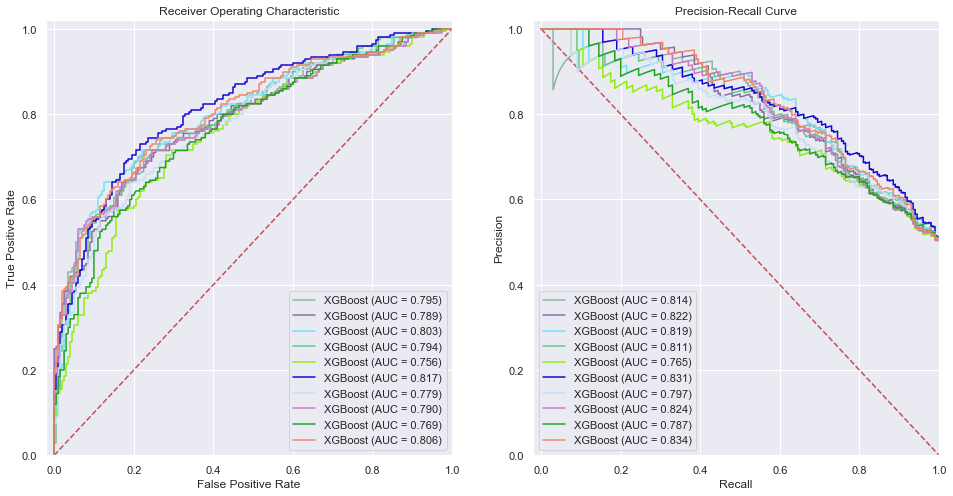

({'XGBoost': 0.8063500000000001}, {'XGBoost': 0.8344910969775203})

In [91]:
evaluate_classifiers(all_X_sample_test, all_y_sample_test, all_clfs=models, clf_names=['XGBoost']*N)

### Feature Selection Stability
To evaluate the model performance under different subset of feature selections, we use PCA to do simple dimension reduction and compare the model performance of all dimensions.

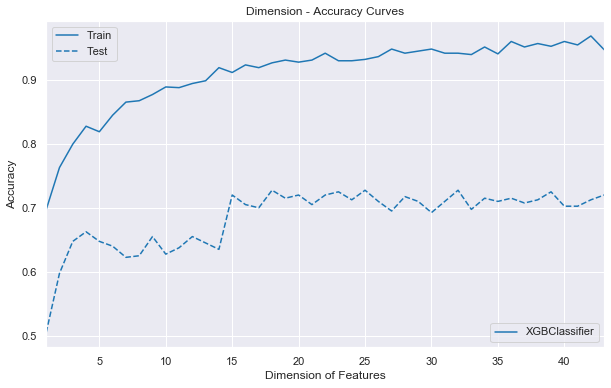

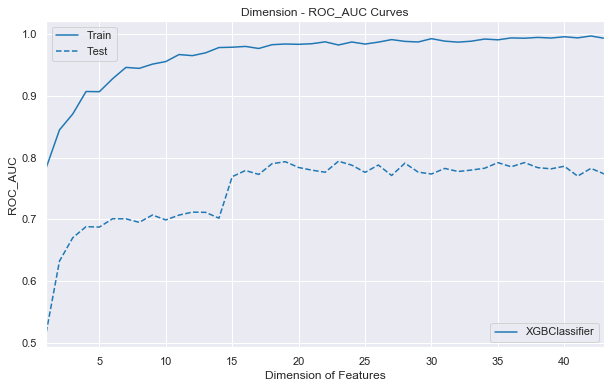

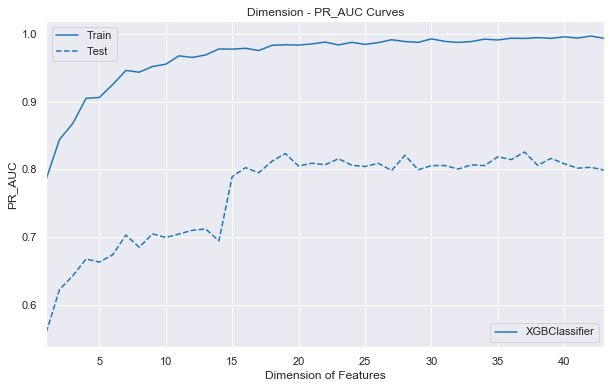

In [92]:
plot_dimension_accuracy_curve(model.X_train, model.y_train, model.X_test, model.y_test, model.estimators[:], OUTPUT_PATH)
plot_dimension_roc_curve(model.X_train, model.y_train, model.X_test, model.y_test, model.estimators[:], OUTPUT_PATH)
plot_dimension_pr_curve(model.X_train, model.y_train, model.X_test, model.y_test, model.estimators[:], OUTPUT_PATH)

### Senstivity Analyses

#### Model tolerance to noise
The risk here is that the model is super narrow, and performance drops suddenly as soon as there is a little bit of noise.  
We test the model tolerance to noise by adding random noise to the features of test set and see the impact.

In [93]:
# X_sample_test.describe().T

In [94]:
def make_noise(R):
    S = int(R * X_sample_test.shape[0])
    X_noise = X_sample_test.copy()
    lo, hi = -2, 10
    X_noise.PAY_0.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_2.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_3.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_4.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_5.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_6.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.WORK_YEARS.loc[X_sample_test.sample(S).index] = np.random.randint(3, 16, size=S)
    X_noise.EDUCATION.loc[X_sample_test.sample(S).index] = np.random.randint(0, 7, size=S)
    X_noise.AGE.loc[X_sample_test.sample(S).index] = np.random.randint(22, 62, size=S)
    X_noise.LIMIT_BAL.loc[X_sample_test.sample(S).index] = np.random.uniform(10000, 630000, size=S)
    lo, hi = -50000, 600000
    X_noise.BILL_AMT1.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT2.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT3.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT4.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT5.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT6.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    lo, hi = 0, 200000
    X_noise.PAY_AMT1.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT2.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT3.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT4.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT5.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT6.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    return X_noise

Our model works fine with 10% - 50% of noise data

Imputed missing data with "median"
Training XGBoost ...


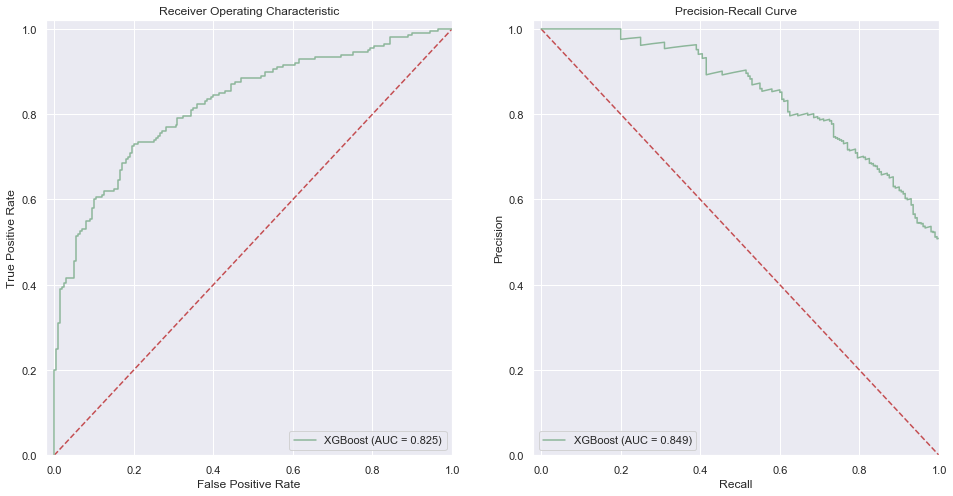

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


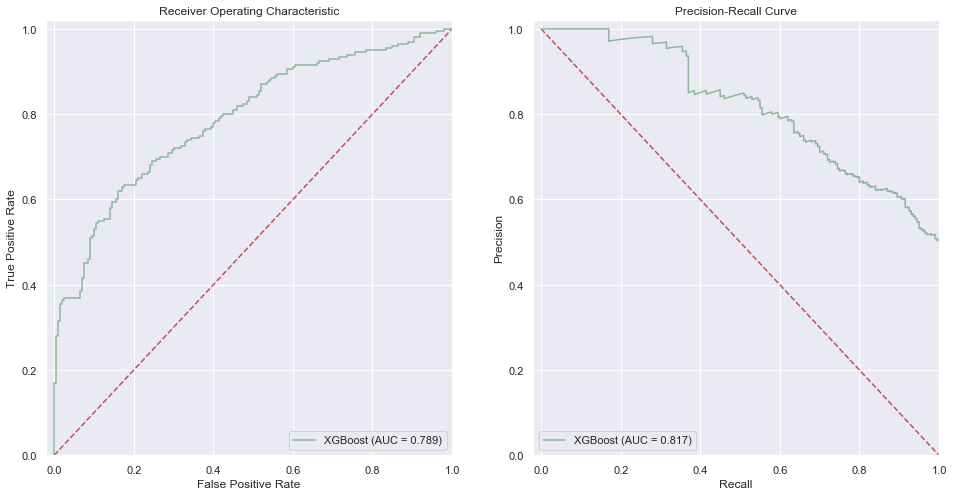

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


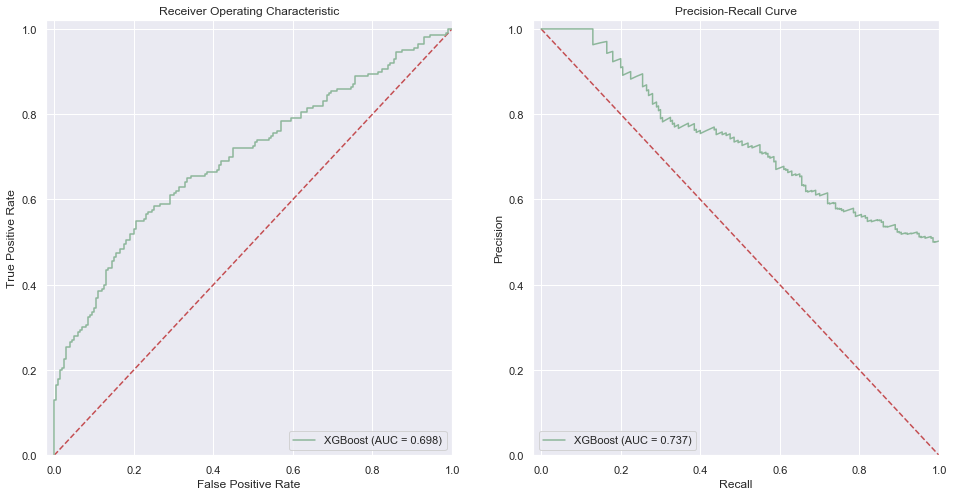

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


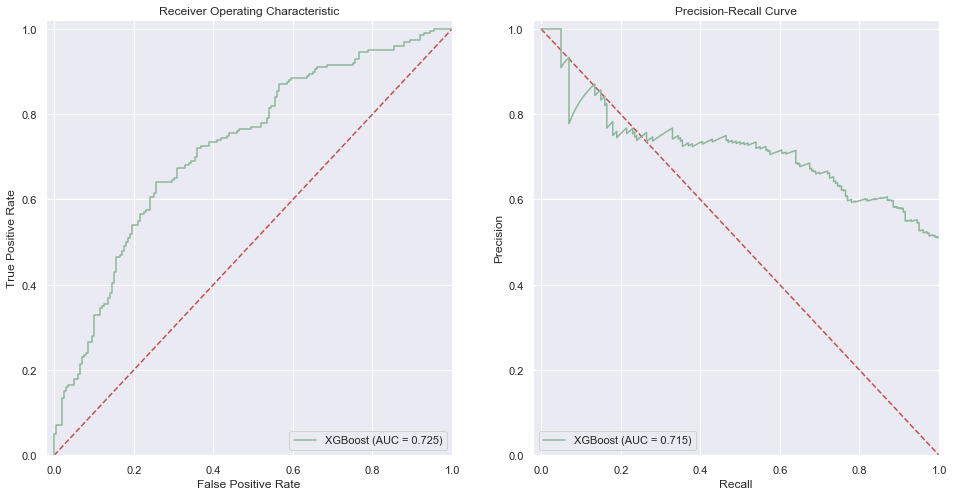

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


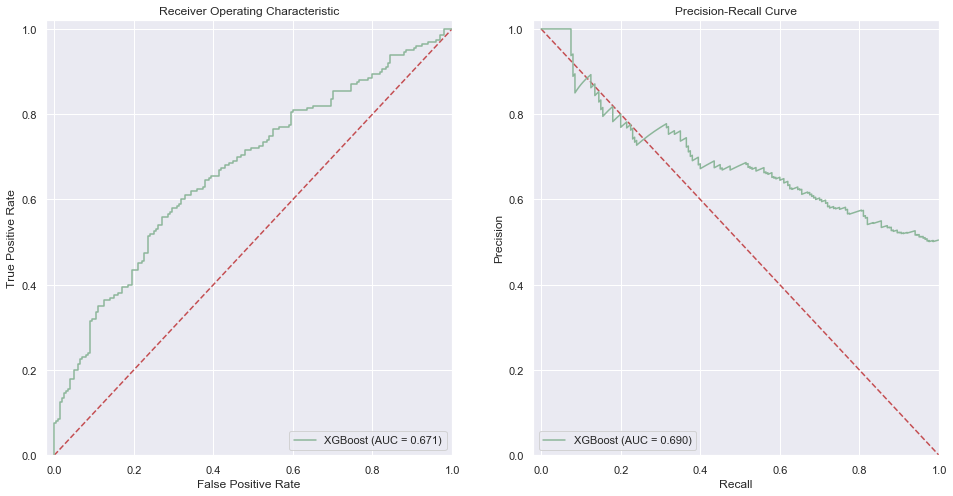

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


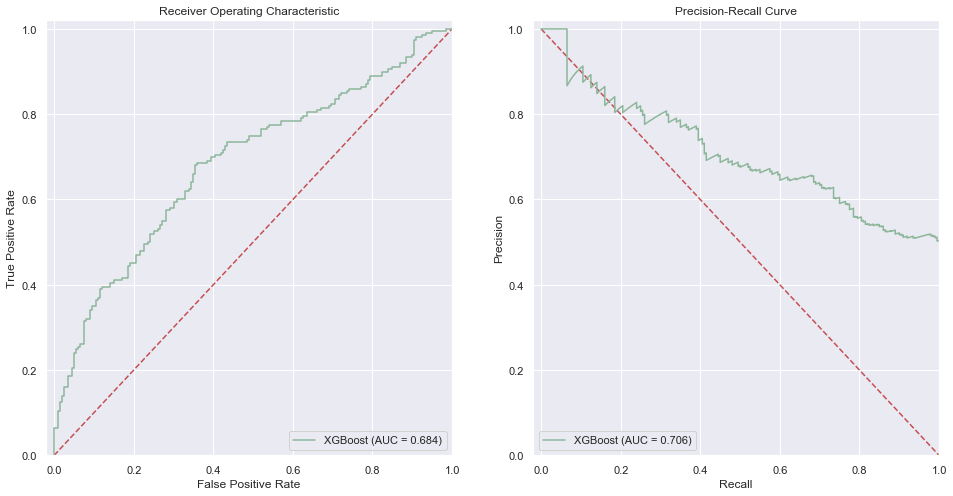

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)


In [95]:
for r in range(6):
    X_noise = make_noise(r/10)
    model.fit(X_sample_train, y_sample_train, X_noise, y_sample_test)
    model.predict(estimator='xgb')

#### Model tolerance to extreme scenarios
We evaluaete our model tolerance to extreme scenarios by creating testing datasets containing extreme and rare events and test our model

In [96]:
def make_extreme(R):
    S = int(R * X_sample_test.shape[0])
    X_noise = X_sample_test.copy()
    lo, hi = -100000000, 100000000
    X_noise.PAY_0.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_2.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_3.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_4.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_5.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.PAY_6.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.WORK_YEARS.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.EDUCATION.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.AGE.loc[X_sample_test.sample(S).index] = np.random.randint(lo, hi, size=S)
    X_noise.LIMIT_BAL.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT1.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT2.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT3.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT4.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT5.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.BILL_AMT6.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT1.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT2.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT3.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT4.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT5.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    X_noise.PAY_AMT6.loc[X_sample_test.sample(S).index] = np.random.uniform(lo, hi, size=S)
    return X_noise

Imputed missing data with "median"
Training XGBoost ...


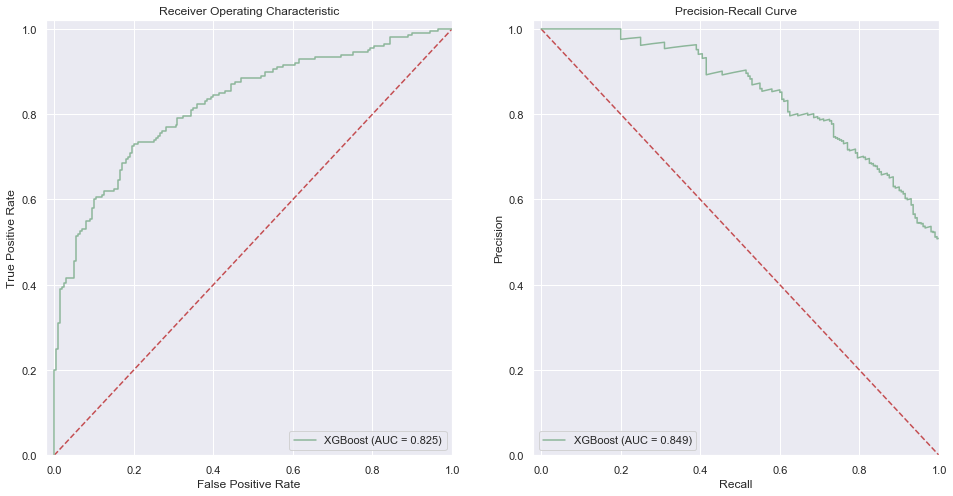

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


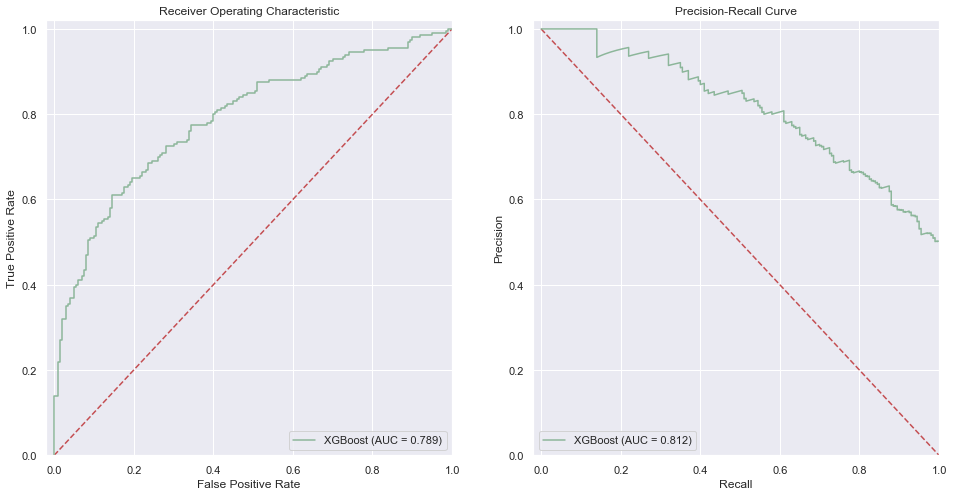

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


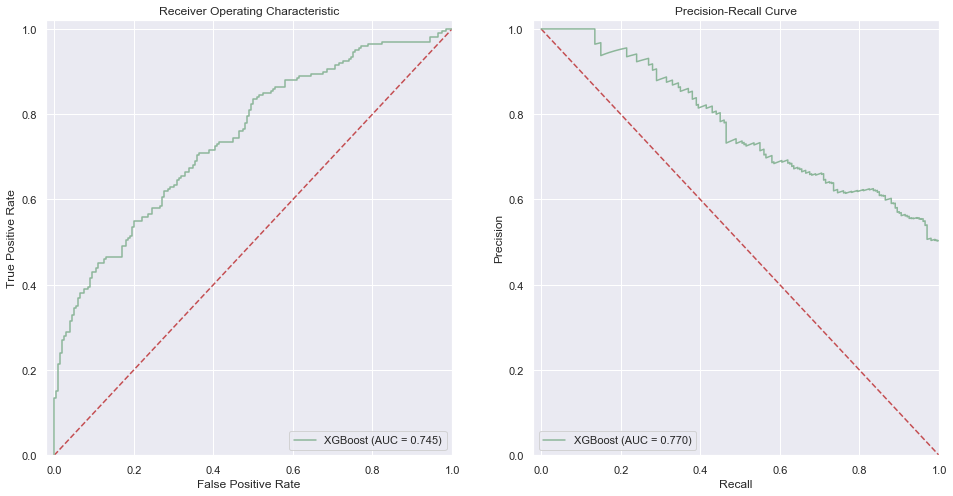

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


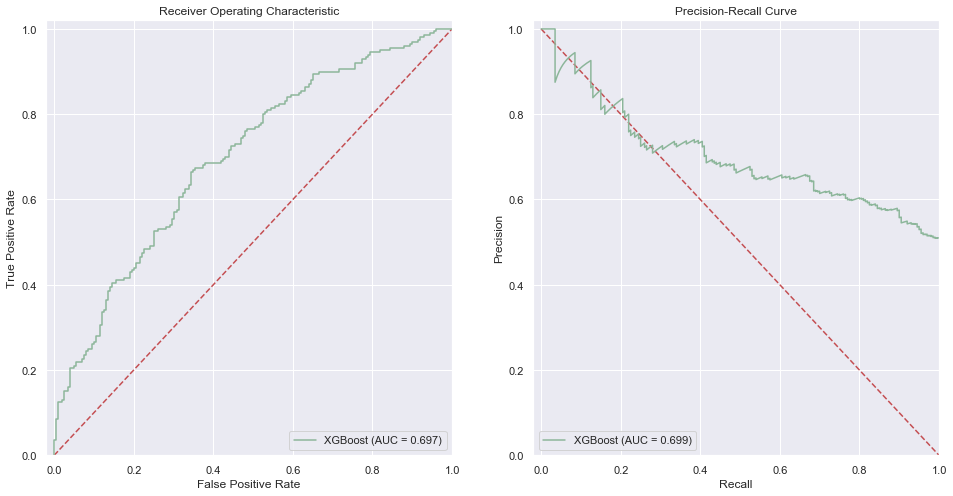

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


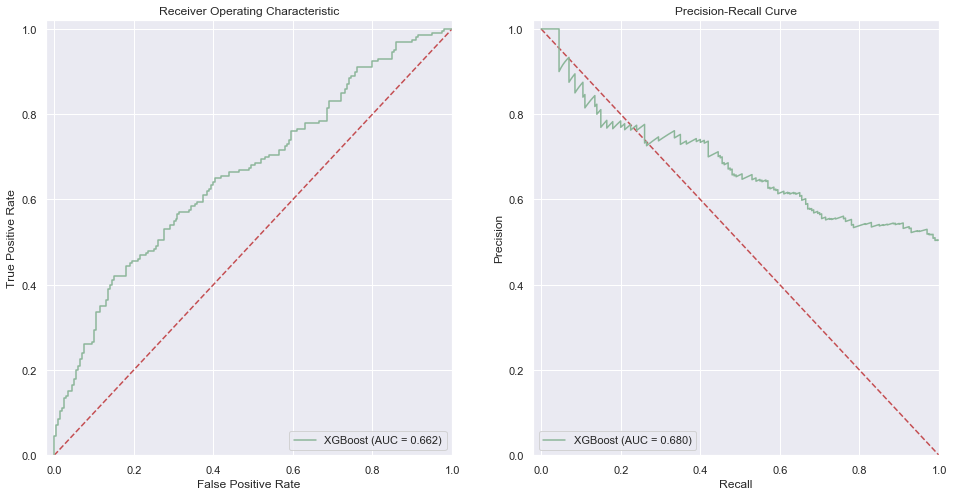

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)
Imputed missing data with "median"
Training XGBoost ...


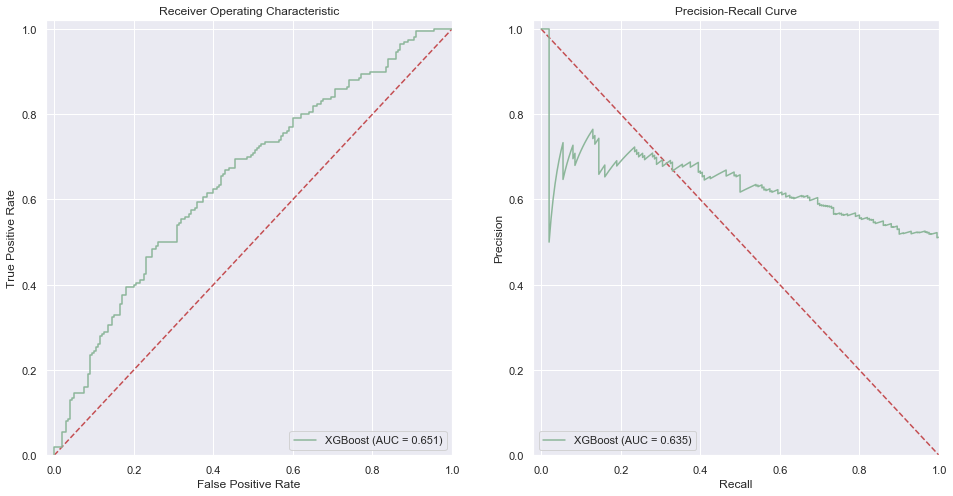

Training Set: X_train (928, 43), y_train (928,)
Test Set: X_test (400, 43), y_test (400,)


In [97]:
for r in range(6):
    X_noise = make_extreme(r/10)
    model.fit(X_sample_train, y_sample_train, X_noise, y_sample_test)
    model.predict(estimator='xgb')

### Bias And Fairness
A model can be influenced by four main types of bias: sample, measurement, and algorithm bias, and bias against groups or classes of people.  
The latter two types, algorithmic bias and bias against people, can be amplified in machine-learning models.

#### Unawareness
This simply means we should not include the sensitive attribute as a feature in the training data.

In [98]:
# X_sample_train.T

In [99]:
protect_features = ['AGE', 'MARRIAGE_0.0', 'MARRIAGE_1.0', 'MARRIAGE_2.0', 'MARRIAGE_3.0', 'SEX_1.0', 'SEX_2.0']
blind_train = X_sample_train.drop(protect_features, axis=1)
blind_test = X_sample_hold.drop(protect_features, axis=1)

Imputed missing data with "median"
Training XGBoost ...


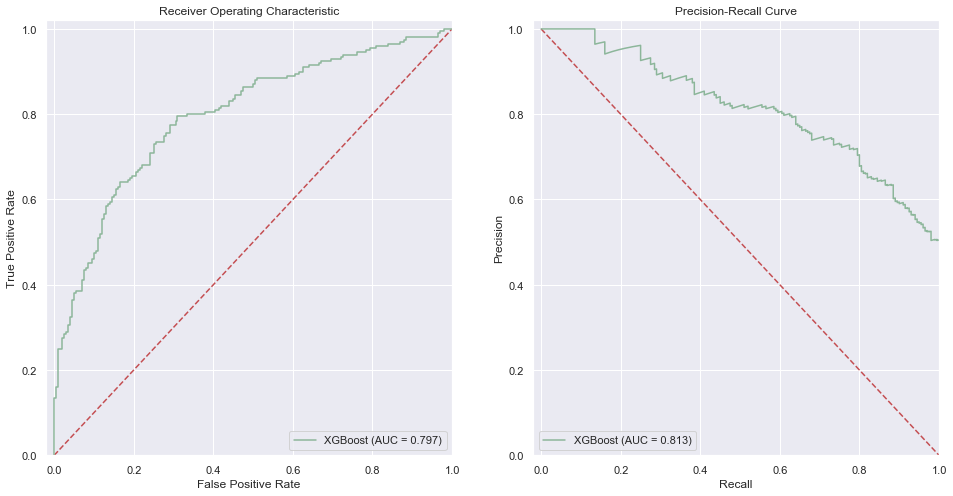

Training Set: X_train (928, 36), y_train (928,)
Test Set: X_test (400, 36), y_test (400,)


In [100]:
model.fit(blind_train, y_sample_train, blind_test, y_sample_hold)
model.predict(estimator='xgb')

#### Demographic parity
Outcomes are proportionally equal for all protected classes.

In [101]:
model.fit(X_sample_train, y_sample_train, X_sample_hold, y_sample_hold)
# model.fit(X_sample_train, y_sample_train, X_test, y_test)
model.predict(estimator='xgb', plot=False)

Imputed missing data with "median"
Training XGBoost ...


In [102]:
N = model.X_test.shape[0]
predicts = model.estimators[0].predict(model.X_test)
sex = [[0,0,0,0],[0,0,0,0]]
marriage = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
for i in range(N):
    X = model.X_test.loc[i]
    t = model.y_test.iloc[i]
    p = predicts[i]
    s = int(X['SEX_1.0'])
    m = [X['MARRIAGE_0.0'],X['MARRIAGE_1.0'],X['MARRIAGE_2.0'],X['MARRIAGE_3.0']]
    i = -1
    if 1 in m:
        i = m.index(1)
    if p:
        if t:
            sex[s][0] += 1
            if i > -1:
                marriage[i][0] += 1
        else:
            sex[s][1] += 1          
            if i > -1:
                marriage[i][1] += 1         
    else:
        if t:
            sex[s][2] += 1
            if i > -1:
                marriage[i][2] += 1           
        else:
            sex[s][3] += 1
            if i > -1:
                marriage[i][3] += 1   

[TP, FP, FN, TN]

In [103]:
sex

[[71, 24, 32, 90], [76, 25, 21, 61]]

In [104]:
marriage

[[0, 0, 0, 1], [76, 25, 25, 62], [71, 22, 27, 67], [0, 0, 1, 0]]

In [105]:
print(f'Probability that a male be classifed as default: {sum(sex[0][:2]) / sum(sex[0])}')
print(f'Probability that a female be classifed as default: {sum(sex[1][:2]) / sum(sex[1])}')

Probability that a male be classifed as default: 0.4377880184331797
Probability that a female be classifed as default: 0.5519125683060109


In [106]:
print(f'Probability that a single person be classifed as default: {sum(marriage[1][:2]) / sum(marriage[1])}')
print(f'Probability that a married person be classifed as default: {sum(marriage[2][:2]) / sum(marriage[2])}')

Probability that a single person be classifed as default: 0.5372340425531915
Probability that a married person be classifed as default: 0.49732620320855614


#### Equal Opportunity
True-positive rates(calculated as TP/TP+FN) are equal for each protected class.

In [107]:
print(f'True positive rate of male: {sex[0][0] / (sex[0][0] + sex[0][2])}')
print(f'True positive rate of female: {sex[1][0] / (sex[1][0] + sex[1][2])}')

True positive rate of male: 0.6893203883495146
True positive rate of female: 0.7835051546391752


In [108]:
print(f'True positive rate of single person: {marriage[1][0] / (marriage[1][0] + marriage[1][2])}')
print(f'True positive rate of married person: {marriage[2][0] / (marriage[2][0] + marriage[2][2])}')

True positive rate of single person: 0.7524752475247525
True positive rate of married person: 0.7244897959183674


#### Equal Odds
True-positive and false-positive rates(calculated as FP/FP+TN) are equal for each protected class.

In [109]:
print(f'False positive rate of male: {sex[0][1] / (sex[0][1] + sex[0][3])}')
print(f'False positive rate of female: {sex[1][1] / (sex[1][1] + sex[1][3])}')

False positive rate of male: 0.21052631578947367
False positive rate of female: 0.29069767441860467


In [110]:
print(f'False positive rate of single person: {marriage[1][1] / (marriage[1][1] + marriage[1][3])}')
print(f'False positive rate of married person: {marriage[2][1] / (marriage[2][1] + marriage[2][3])}')

False positive rate of single person: 0.28735632183908044
False positive rate of married person: 0.24719101123595505


## Reference
- [Machine learning financial risk management](https://www.mckinsey.com/business-functions/risk/our-insights/derisking-machine-learning-and-artificial-intelligence)  
- [Model Risk - Overview, Sources, and MRM Framework](https://corporatefinanceinstitute.com/resources/knowledge/modeling/model-risk/)  
- [Overview of Sensitivity Analysis](https://corporatefinanceinstitute.com/resources/knowledge/modeling/what-is-sensitivity-analysis/)  
- [The Comprehensive Guide to Model Validation Framework](https://medium.com/@ODSC/the-comprehensive-guide-to-model-validation-framework-what-is-a-robust-machine-learning-model-7bdbc41c1702)  
- [Validating your Machine Learning Model](https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7)
- [Counterfactual Fairness](https://arxiv.org/abs/1703.06856)

### ====================Stop here==============================